# Proyecto de clustering de segmentación de países por datos socio-económicos

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Carga de datos

In [ ]:
df_country = pd.read_csv('https://raw.githubusercontent.com/Patchwtf/MachineLearningProyects/refs/heads/main/Resources/Country-data.xls')

In [ ]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejando valores nulos

In [ ]:
df_country.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## Validando duplicados

In [ ]:
df_country[df_country.duplicated]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
df_country.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


## Análisis de distribución

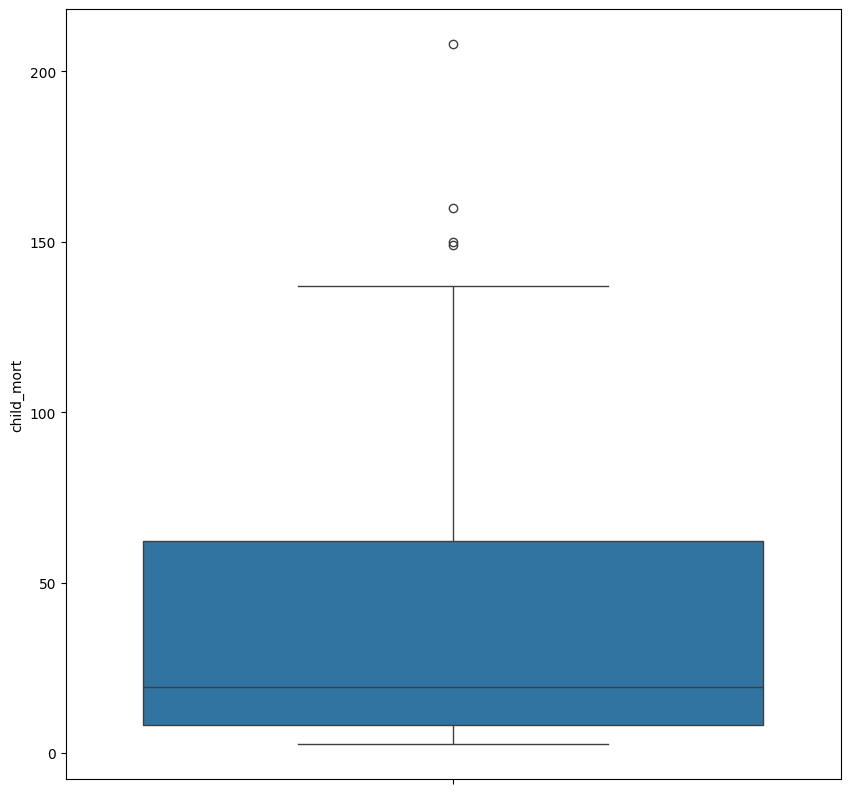

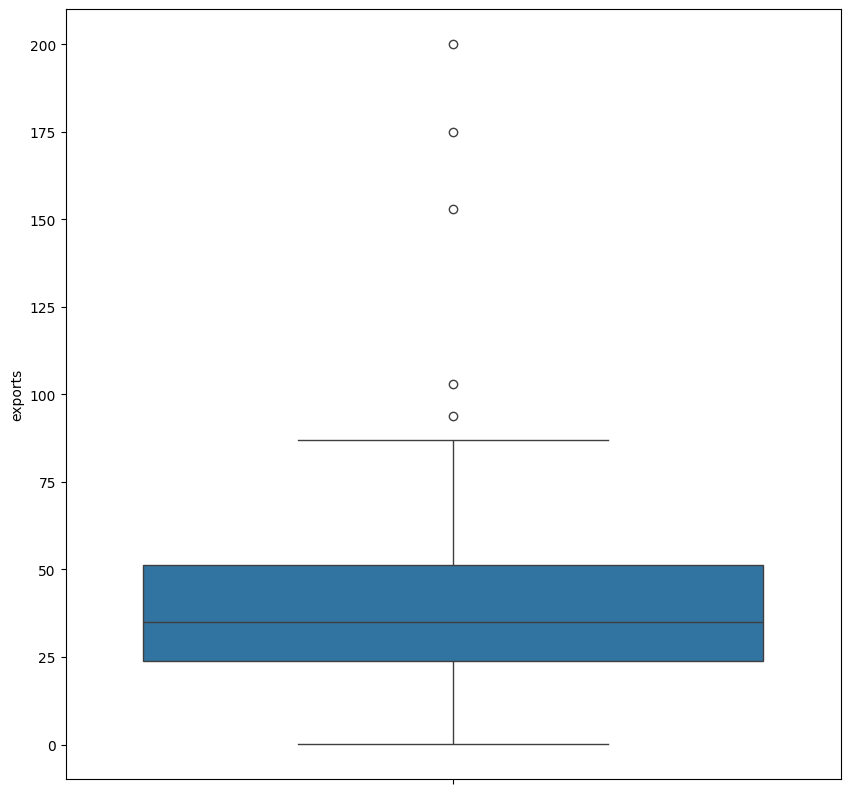

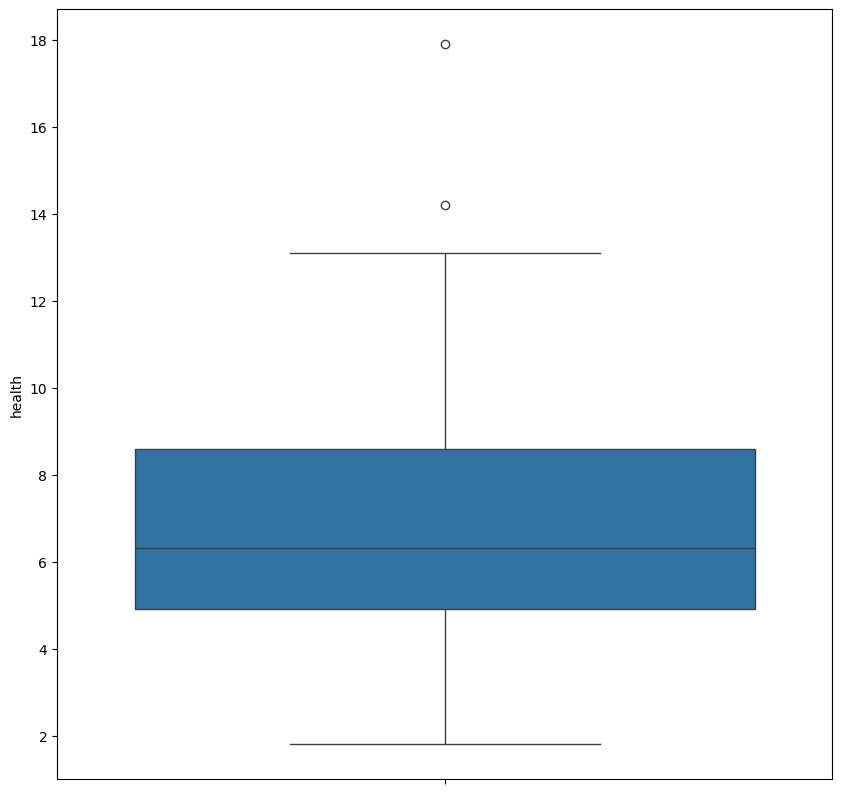

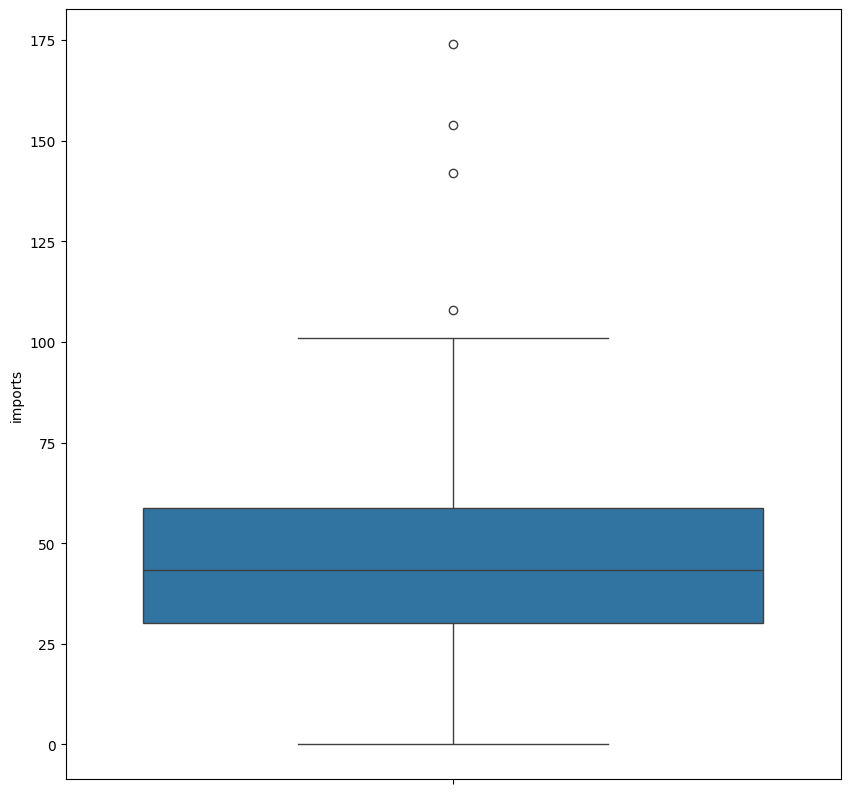

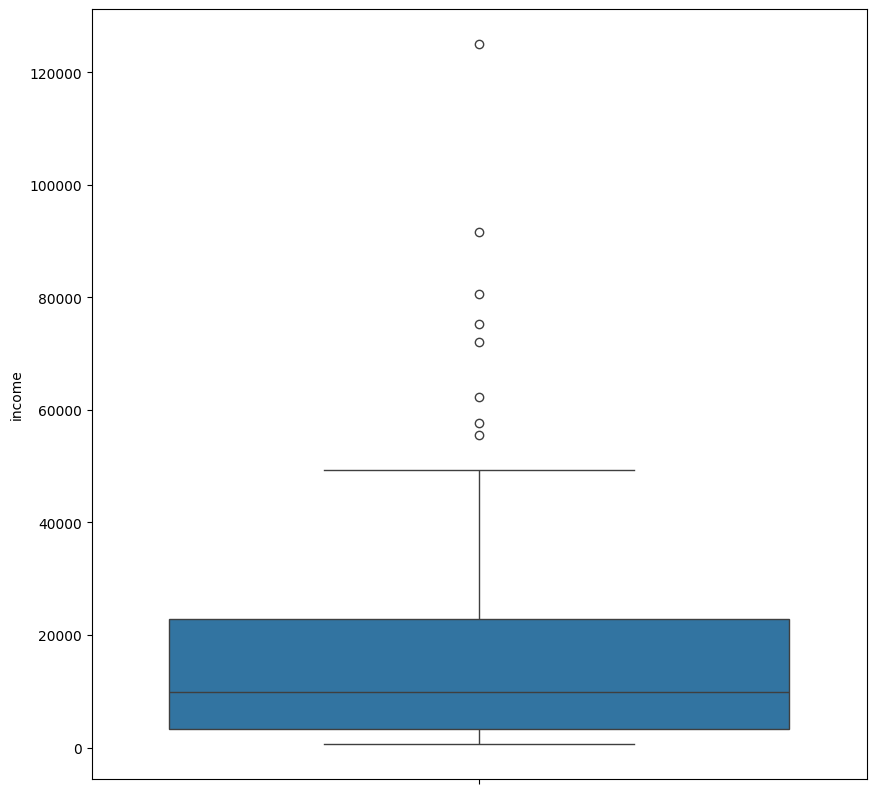

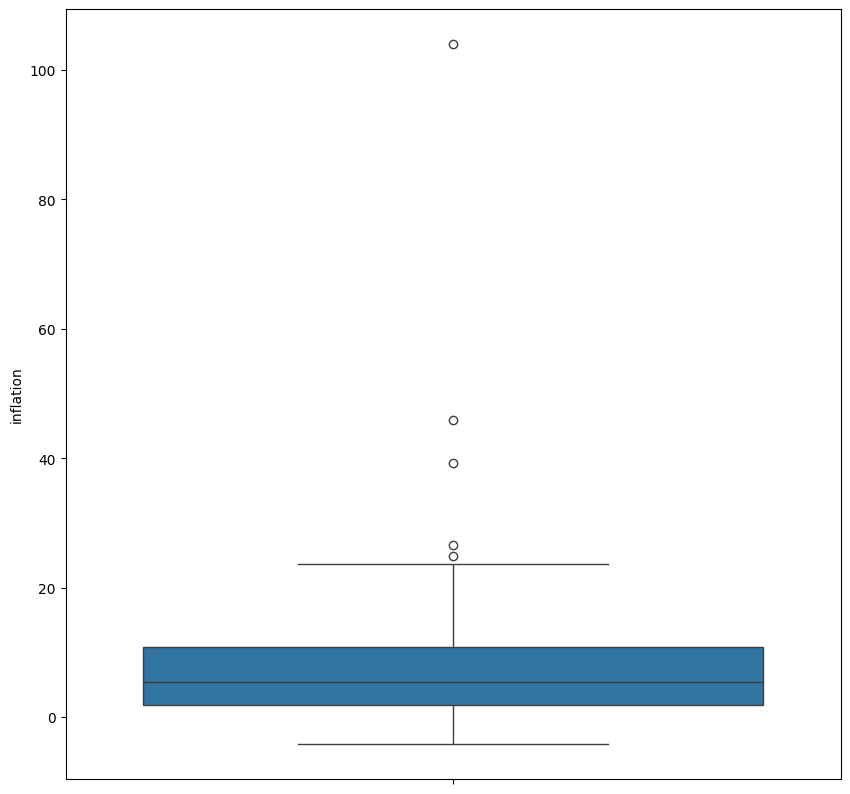

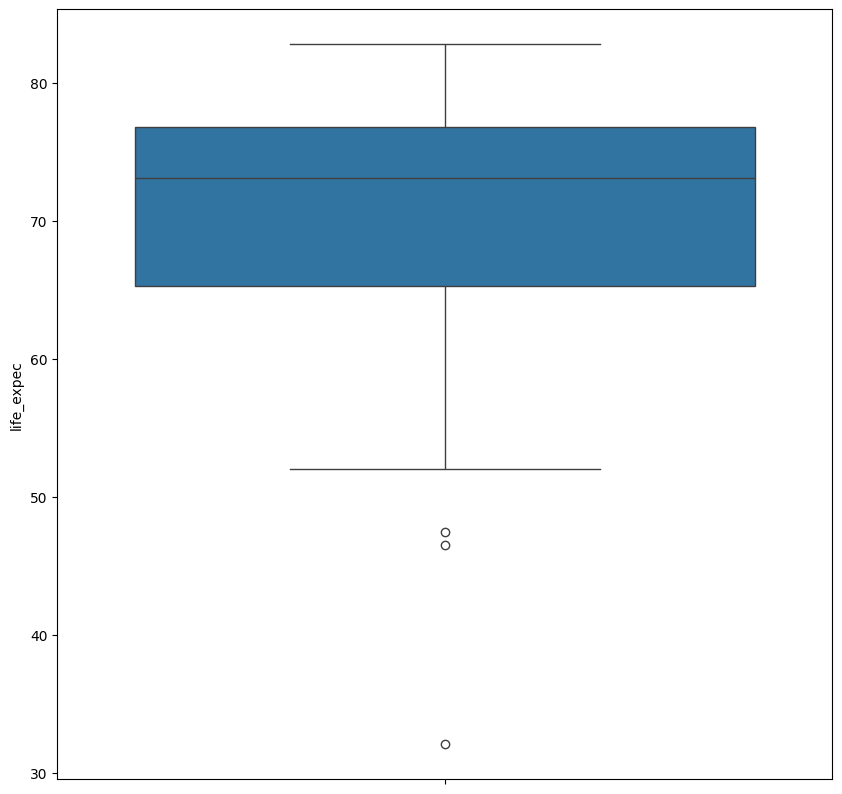

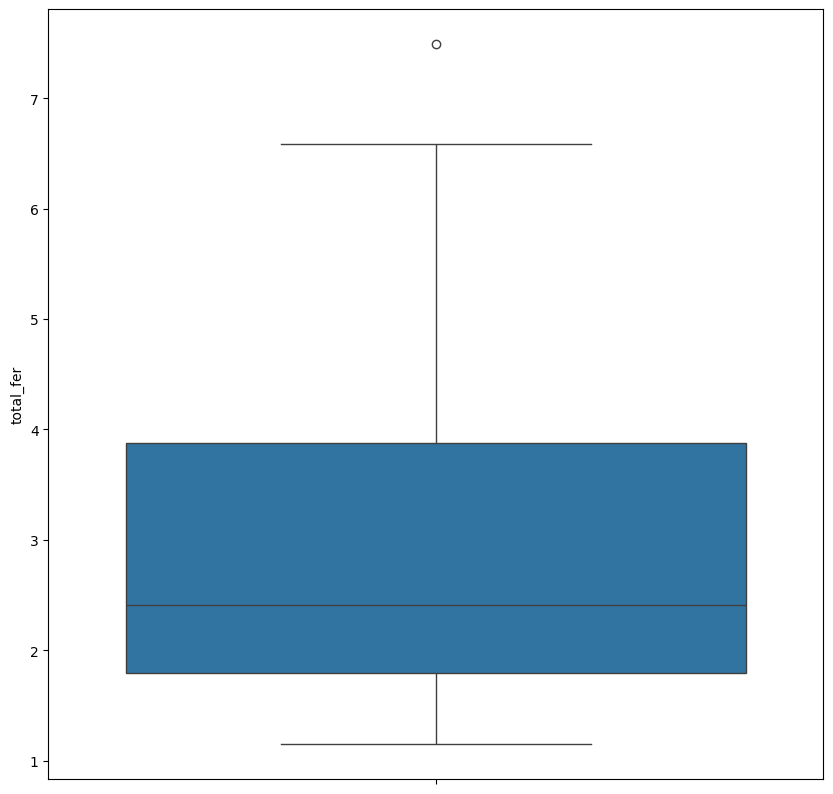

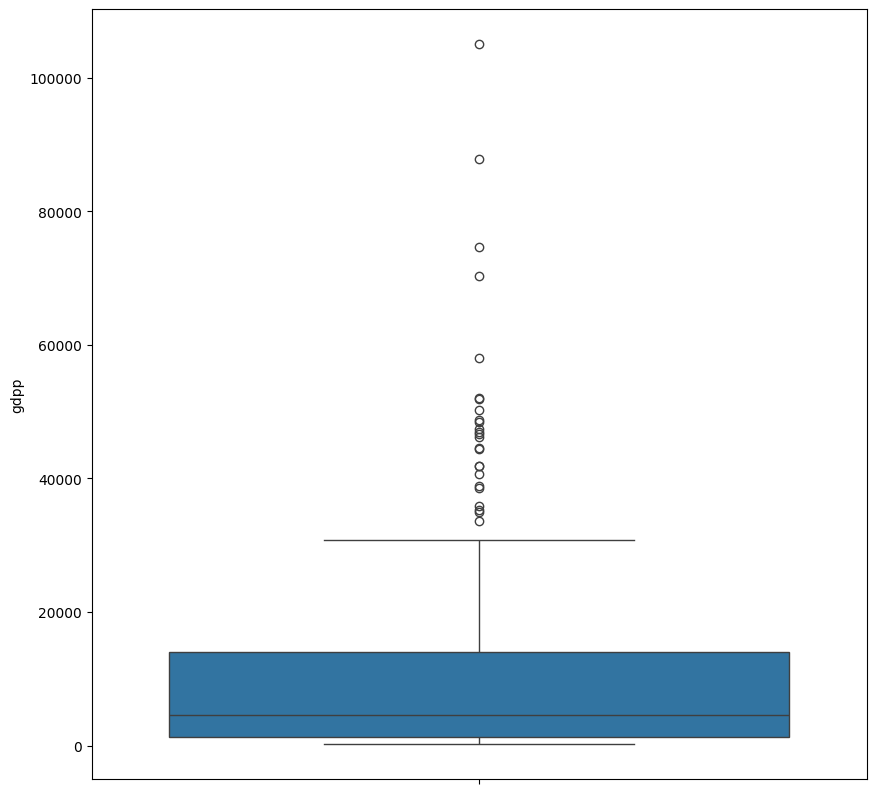

In [ ]:
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
  plt.figure(figsize=(10,10))
  sns.boxplot(data=df_country, y= _)
  plt.show()

In [ ]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


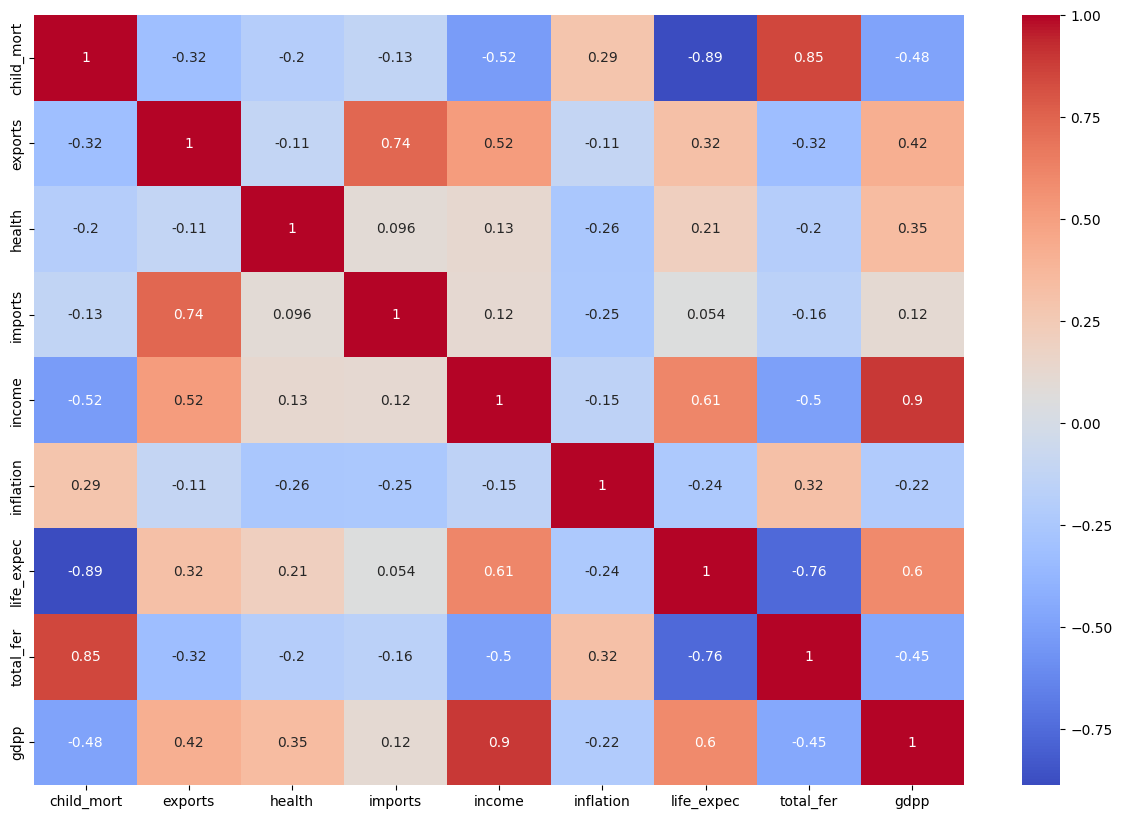

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.show()

## Escalar datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()

In [ ]:
df_country_scaled = scaaler.fit_transform(df_country.drop('country', axis=1))

In [47]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)

## PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
pca.fit_transform(df_country_scaled)
pca_data_scaled = pca.fit_transform(df_country_scaled)

pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ..., -0.38300026,
        -0.41507602,  0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ..., -0.24891887,
         0.22104247, -0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ...,  0.08721359,
         0.18416209, -0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ...,  0.14362677,
         0.21759009,  0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ..., -0.06025631,
        -0.08949452,  0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ...,  0.44218462,
        -0.66433809,  0.44148176]])

In [52]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


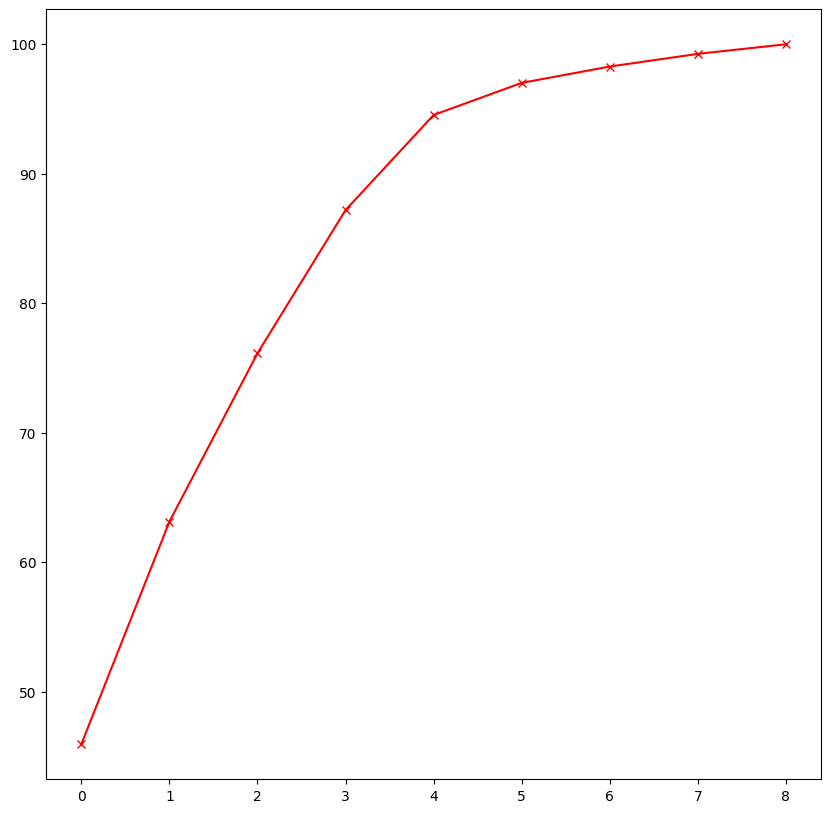

In [53]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [54]:
pca_data_standart = pd.DataFrame(pca_data_scaled)
pca_data_standart.drop([4,5,6,7,8], axis=1, inplace=True)

In [55]:
pca_data_standart

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar librerías para clustering

In [56]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### PCA

In [79]:
Sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k:
  km = KMeans(n_clusters= _)
  y = km.fit_predict(pca_data_standart)
  Sum_of_squared_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(pca_data_standart, y))

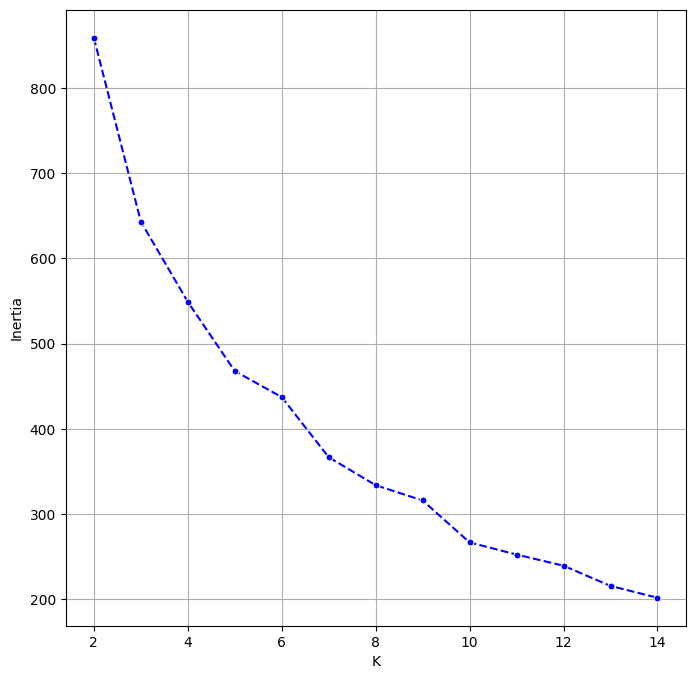

In [92]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(x=k, y=Sum_of_squared_distances, linestyle='dashed', marker='o', markersize=5, color='b', )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

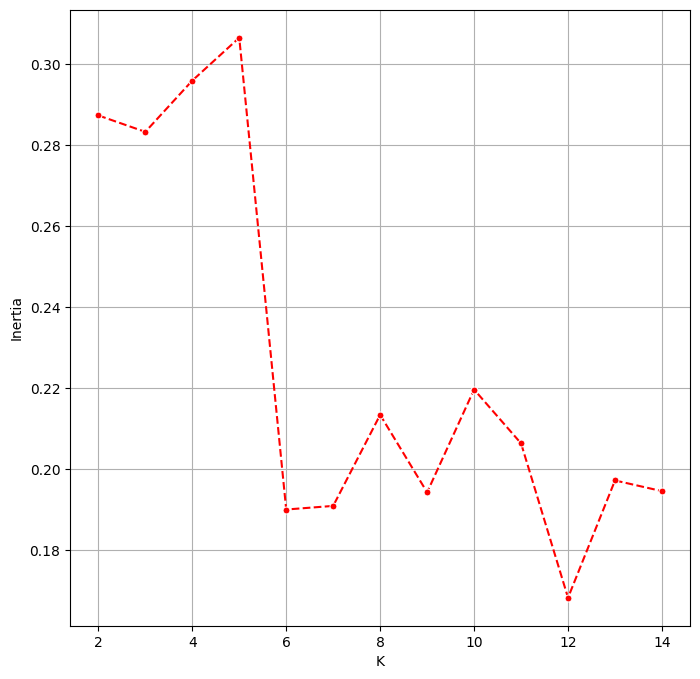

In [98]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(x=k, y=silhouette_scores, linestyle='dashed', marker='o', markersize=5, color='r' )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [95]:
km = KMeans(n_clusters= 4)
y = km.fit_predict(pca_data_standart)
print(silhouette_score(pca_data_standart, y))
df_country['k_means_pca'] = y

0.34930392685434875


### Sin PCA

In [106]:
Sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k:
  km = KMeans(n_clusters= _)
  y = km.fit_predict(df_country_scaled)
  Sum_of_squared_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(df_country_scaled, y))

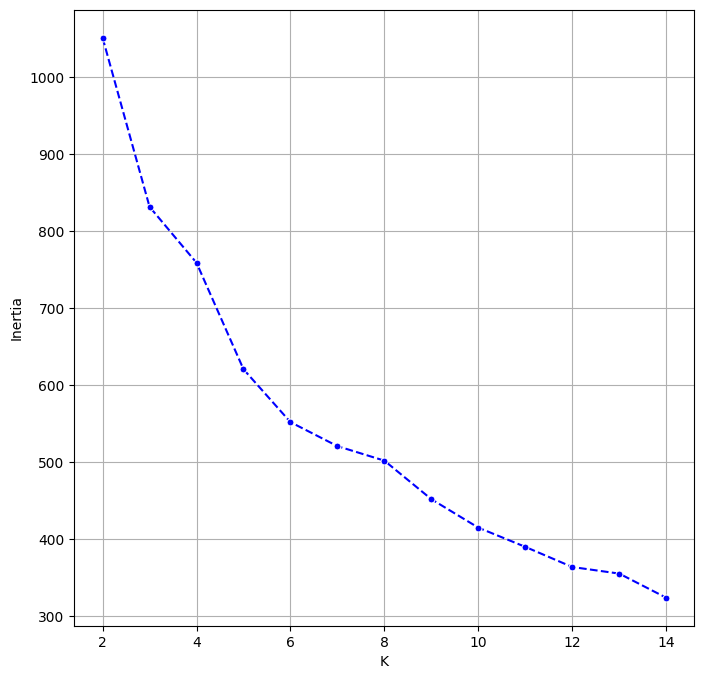

In [107]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(x=k, y=Sum_of_squared_distances, linestyle='dashed', marker='o', markersize=5, color='b', )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

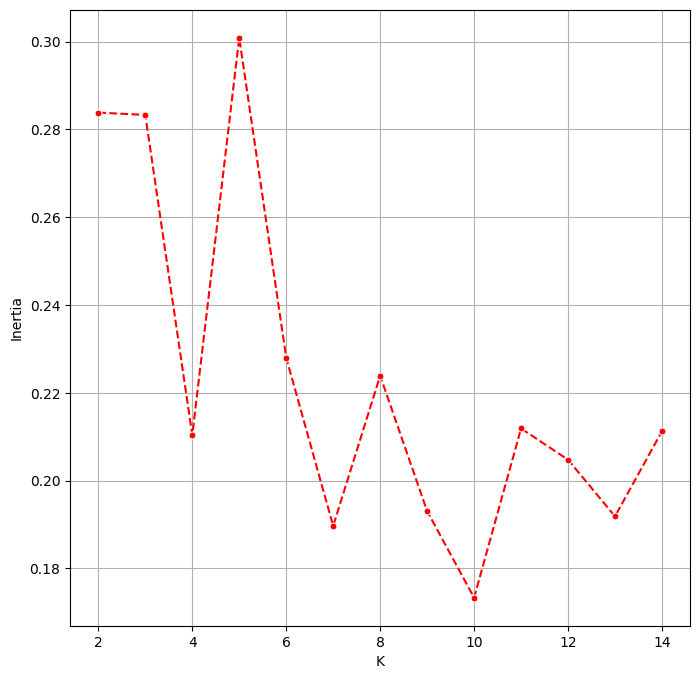

In [108]:
fig = plt.figure(figsize=(8,8))
sns.lineplot(x=k, y=silhouette_scores, linestyle='dashed', marker='o', markersize=5, color='r' )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [112]:
km = KMeans(n_clusters= 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.2812738792674669


## Agglomerativen hierarchical clustering

### PCA

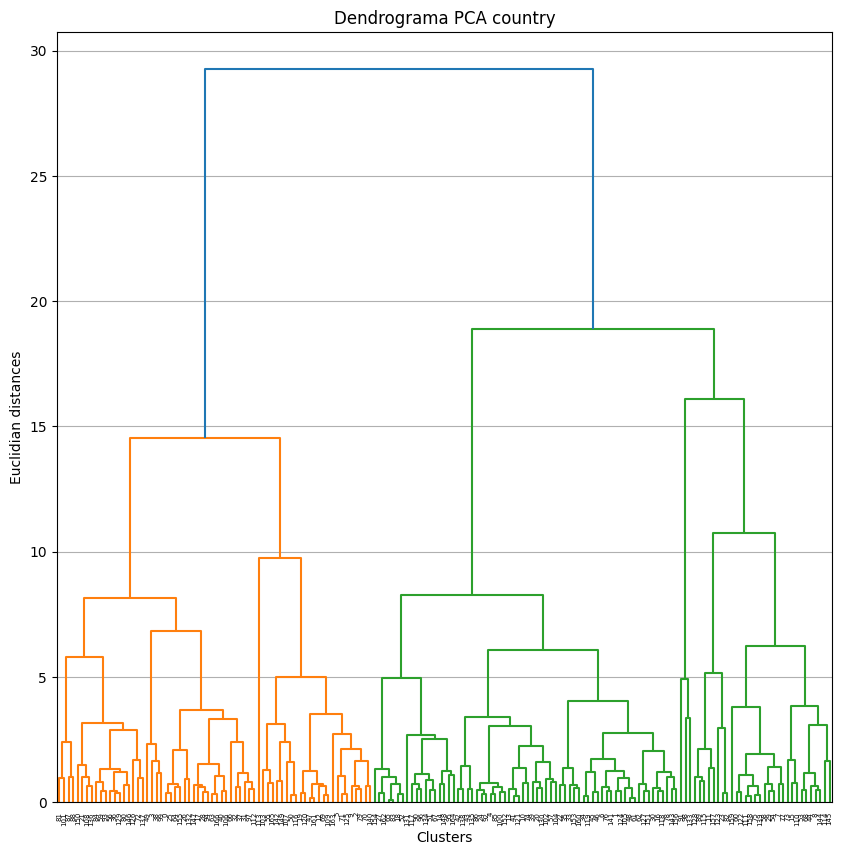

In [118]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standart, method='ward'))
plt.title('Dendrograma PCA country')
plt.xlabel('Clusters')
plt.ylabel('Euclidian distances')
plt.grid(axis='y')
plt.show()

In [137]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(pca_data_standart)
print(silhouette_score(pca_data_standart, y_hc))
df_country['hc_pca']=y_hc

0.3070110704080524


### Sin PCA

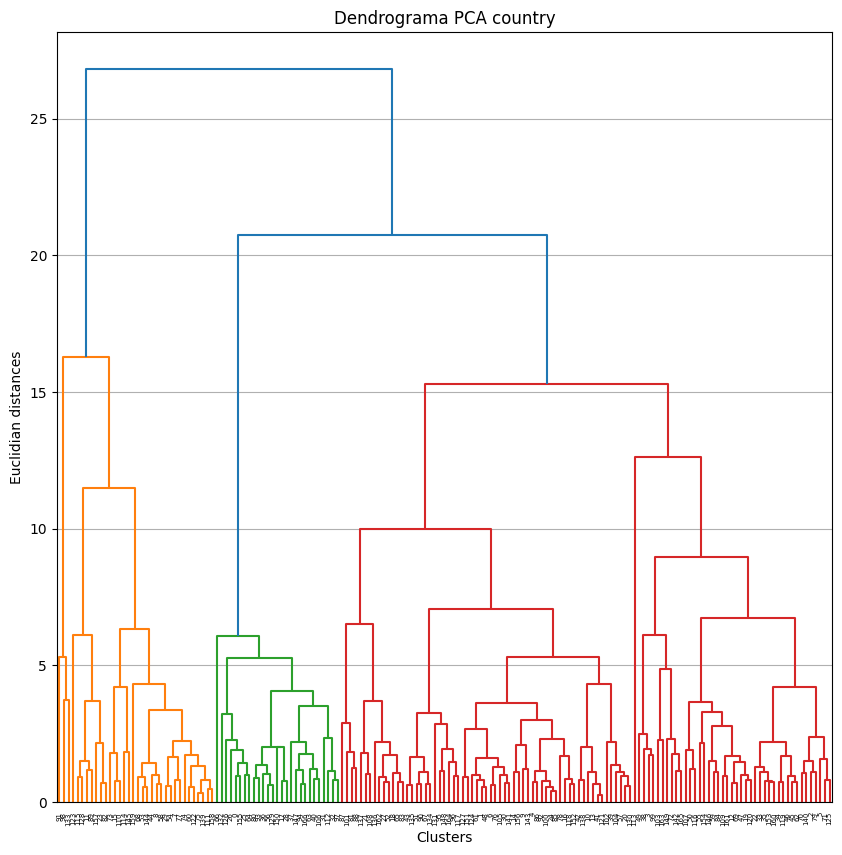

In [133]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma PCA country')
plt.xlabel('Clusters')
plt.ylabel('Euclidian distances')
plt.grid(axis='y')
plt.show()

In [139]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc']=y_hc

0.3153134331018189


## DBSCAN

### PCA

### Sin PCA

## Evaluación de resultados